# Session 1: homework

## 1. Exploring datasets: Exercise spelling

### Loading and inspecting the data

Load and inspect `spelling/spelling_utf8.csv`. Read the `README`
 to get familiar with this dataset and its variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# You don't need to do this, but it might come in handy one day. The original version of the dataset
# was a TSV written in Windows, which uses a different "character encoding" sometimes. Normally,
# Python always uses "UTF-8" (and that is what we would recommend you stick to). If you try to open
# a file with the wrong encoding on the wrong machine you will see some confusing errors like this:
#
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 15048: invalid start byte
#
# This is how we fixed that for you.

# import chardet

# with open("../datasets/spelling/spelling.tsv", "rb") as f:
#     raw = f.read()

# chardet.detect(raw)

In [5]:
# This only works with the Windows encoding
# df = pd.read_csv("../datasets/spelling/spelling.tsv", sep="\t", encoding="Windows-1252")

# This should always work

df = pd.read_csv("../../datasets/spelling/spelling_utf8.csv")
df

,subject_ID,lemma,gender,age,education,grade,error
0,325,aanbidden,male,17,general,Gr3,0
1,563,aanbidden,female,18,technical,Gr3,0
2,742,aanbieden,male,18,vocational,Gr3,0
3,899,aanbieden,male,17,vocational,Gr3,0
4,625,aanbieden,female,16,general,Gr2,0
...,...,...,...,...,...,...,...
5820,website88,worden,female,17,general,Gr3,0
5821,website88,worden,female,17,general,Gr3,0
5822,website88,worden,female,17,general,Gr3,0
5823,325,zenden,male,17,general,Gr3,0


### Data exploration

Can we observe an education difference in the number of errors that are made (`error` = 0 vs `error` = 1)? Create a table with `error` (0/1) per educational track.

In [6]:
# I prefer to have booleans as Python booleans. This is optional.

df["error"] = df["error"] == 1
df

,subject_ID,lemma,gender,age,education,grade,error
0,325,aanbidden,male,17,general,Gr3,False
1,563,aanbidden,female,18,technical,Gr3,False
2,742,aanbieden,male,18,vocational,Gr3,False
3,899,aanbieden,male,17,vocational,Gr3,False
4,625,aanbieden,female,16,general,Gr2,False
...,...,...,...,...,...,...,...
5820,website88,worden,female,17,general,Gr3,False
5821,website88,worden,female,17,general,Gr3,False
5822,website88,worden,female,17,general,Gr3,False
5823,325,zenden,male,17,general,Gr3,False


In [7]:
df.groupby("education")["error"].value_counts()

education   error
general     False    1622
            True      326
technical   False    1911
            True      844
vocational  False     623
            True      499
Name: count, dtype: int64

Here is an alternative method that we didn't cover, which is a bit prettier. Check the documentation and see which way you prefer.

In [8]:
pd.crosstab(df.education, df.error)

error,False,True
education,,
general,1622,326
technical,1911,844
vocational,623,499


Now convert this table to a proportion table (percentages). In addition, make the table a bit easier on the eye by rounding the percentages to two digits with `round()`.

In [9]:
df.groupby("education")["error"].value_counts(normalize=True).round(2)

education   error
general     False    0.83
            True     0.17
technical   False    0.69
            True     0.31
vocational  False    0.56
            True     0.44
Name: proportion, dtype: float64

##### Question:
> How to interpret these percentages?

##### Answer:
> All students are more inclined to *not* make an error than to make an error. But this inclination is stronger as students are in more theory-oriented tracks (= technical and especially general education).

Now repeat these steps, but print column totals instead of row totals---in other words, for each value of 'error' the 'education' values should add up to 1.

In [10]:
df.groupby("error")["education"].value_counts(normalize=True).round(2)

error  education 
False  technical     0.46
       general       0.39
       vocational    0.15
True   technical     0.51
       vocational    0.30
       general       0.20
Name: proportion, dtype: float64

In [11]:
pd.crosstab(df.education, df.error, normalize="columns").round(2)

error,False,True
education,,
general,0.39,0.20
technical,0.46,0.51
vocational,0.15,0.30


### Data visualization

Create a mosaic plot from the original dataframe (raw frequencies).

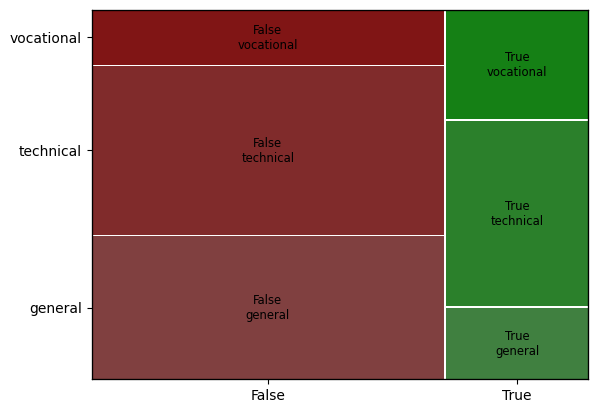

In [12]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ["error", "education"])
plt.show()

##### Question:
> How to interpret the plot?

##### Answer:
> The plot tells us the same as the table, but in a visual way. We can see that more practice-oriented students make more errors than more theory-oriented students. Furthermore, the amount of data available for the three educational tracks is shown too: we have the most data for technical students, then for general students, then for vocational students.

Can you recreate this plot, but with education on the "y-axis" and error on the "x-axis"?

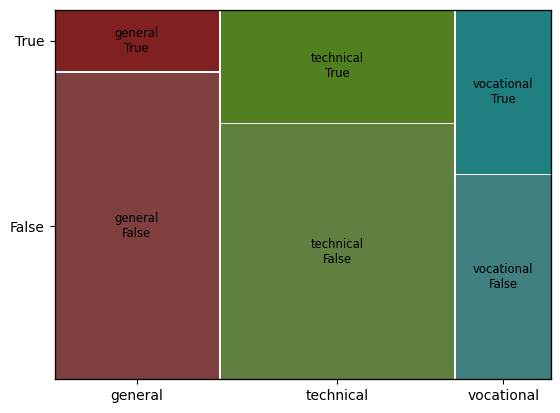

In [13]:
mosaic(df, ["education", "error"])
plt.show()

## 2. Spanish authors from the Silver Age

In the next session, we'll work with a dataset that contains general information about a number of canonical Spanish authors from the so-called "Silver Age" of Hispanic literature. Let us explore this data already with a couple of simple (and not so simple) exercises:


- Load the dataset `sp-authors.tsv` from the folder `../datasets/correlaciones`. Pay attention to the extension!
- get an overview of the dataframe in the notebook using the 'last thing evaluated' trick

In [16]:
span_auth = pd.read_csv("../../datasets/correlaciones/sp-authors.tsv", sep="\t")
span_auth

,id,author-fullname,author,birth,death,gender,pages-in-manual,novels,works,life-span,digitzed-by
0,1,Rosalía de Castro,RdCastro,1837,1885,female,17,1,1,48,6
1,2,Enrique Pérez Escrich,Escrich,1829,1897,male,1,4,17,68,5
2,3,Antonio de Trueba y de la Quintana,Trueba,1819,1889,male,1,0,1,70,6
3,4,José Selgas Carrasco,Selgas,1822,1882,male,1,5,7,60,"4,5"
4,5,Francisco Navarro Villoslada,Villoslada,1818,1895,male,"1,2",0,0,77,5.5
...,...,...,...,...,...,...,...,...,...,...,...
128,129,Rafael Sánchez Mazas,Mazas,1894,1966,male,4,1,1,72,0
129,130,Ramón del Valle-Inclán,Valle,1866,1936,male,162,13,16,70,5
130,131,Julio Camba,JCamba,1882,1962,male,1,0,7,80,4
131,132,Rubén Darío,Dario,1867,1916,male,50,2,3,49,6


- Inspect this dataset's contents via `describe()`.

In [17]:
span_auth.describe()

,id,birth,death,novels,works,life-span
count,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,67.00000,1879.022556,1946.721805,5.481203,11.939850,67.699248
std,38.53786,21.959835,26.964161,8.810807,21.437986,14.829835
min,1.00000,1818.000000,1882.000000,0.000000,0.000000,32.000000
25%,34.00000,1867.000000,1932.000000,1.000000,2.000000,58.000000
50%,67.00000,1882.000000,1947.000000,3.000000,6.000000,68.000000
75%,100.00000,1897.000000,1965.000000,7.000000,15.000000,80.000000
max,133.00000,1917.000000,2009.000000,63.000000,201.000000,103.000000


- How many columns are in the dataset? How many rows?

In [18]:
span_auth.shape

(133, 11)

- Print the column names that are used in the dataset.

In [19]:
span_auth.columns

Index(['id', 'author-fullname', 'author', 'birth', 'death', 'gender',
       'pages-in-manual', 'novels', 'works', 'life-span', 'digitzed-by'],
      dtype='object')

- What's the number of female authors in the dataset? How many male authors does it contain? Make a barplot of the counts for both genders.

In [20]:
span_auth.gender.value_counts()

gender
male      125
female      8
Name: count, dtype: int64

<Axes: xlabel='gender'>

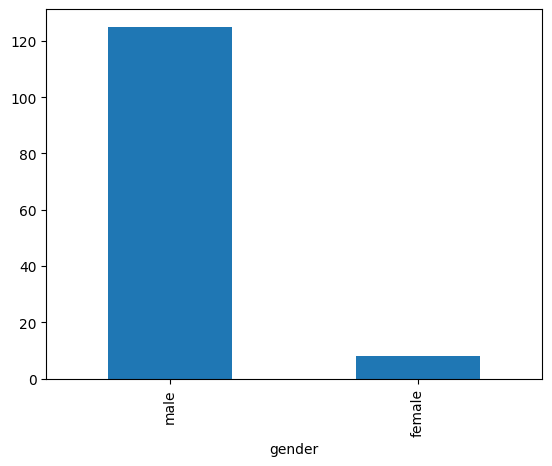

In [21]:
span_auth.gender.value_counts().plot.bar()

- Check out the "life.span" column, that lists the age of each author at her/his time of death. What was the age of the youngest and oldest author (at their time of death)? What is the range of this column?

In [22]:
# (check the min and max)

span_auth["life-span"].describe()

count    133.000000
mean      67.699248
std       14.829835
min       32.000000
25%       58.000000
50%       68.000000
75%       80.000000
max      103.000000
Name: life-span, dtype: float64

- Calculate the mean and standard deviation for the average for these authors' life spans, **without making use of the functions `mean()` and `std()`**. Use these functions afterwards to verify whether your calculation is correct.

In [23]:
m = span_auth["life-span"].sum() / span_auth["life-span"].size

print(f"Mean: {m} (Check: {span_auth['life-span'].mean()})")

Mean: 67.69924812030075 (Check: 67.69924812030075)


In [24]:
diffs = span_auth["life-span"] - span_auth["life-span"].mean()
sum_sq_diffs = (diffs * diffs).sum()
var = sum_sq_diffs / (span_auth["life-span"].size - 1)
sd = var ** (1 / 2)

print(f"SD: {sd} (Check: {span_auth['life-span'].std()})")

SD: 14.829835285056584 (Check: 14.829835285056584)


- Sort the dataframe by the 'works' column in **descending** order (most works first). Print the names of the first 7 authors by works (most works). Print the names of the last 7 authors by works (fewest works).

In [ ]:
w = span_auth.sort_values(by="works", ascending=False)
print(w.head(7)["author-fullname"])
print(w.tail(7)["author-fullname"])

In [ ]:
# You could also do it like this:

w = span_auth.sort_values(by="works", ascending=False)
print(w.head(7)[["author-fullname", "works"]])
print(w.tail(7)[["author-fullname", "works"]])

- Plot the number of "novels" that these authors wrote as a function of the number of (other) "works" that they produced. What do you observe?

##### Answer
> There is certainly a correlation between the number of total works and the number of novels. Most of the datapoints are near the origin, with only a few outliers who wrote many works.

In [ ]:
span_auth.plot.scatter(x="novels", y="works")

- What's the mode of the "gender" column in this dataset?

In [ ]:
span_auth.gender.mode()

## 3. Queer speech

In the next session, we'll work with measurements of the "pitch" (i.e. the perceived frequency of sound) in the speech of Spanish-speaking adults. The dataset comes from a research project in the field of sociophonetics, in which the pitch of heterosexual men was compared to the pitch of homosexual men, as well as female speakers.

- Load this dataset (it's a csv-file!) and dump the summary in a cell (evaluate it). You can find it as: `../datasets/queer/queer_speech.csv`

In [ ]:
qs = pd.read_csv("../datasets/queer/queer_speech.csv")
qs

In [ ]:
qs.columns

- Calculate the normalized proportion of the number of men and women in the dataset.

In [ ]:
qs.sex.value_counts(normalize=True)

- Create a new data frame, called "male", selecting only the male rows from the data.

In [ ]:
qsm = qs[qs.sex == "M"]
qsm

- The average pitch of a speaker is represented in the column "meanf0". Calculate the mean and standard deviation for each of the two sexual orientations among the male speakers. Use a boxplot to compare the values for "meanf0" in both categories, including the "notches" from the sprint. Describe what you observe.

In [ ]:
qsm.groupby("orientation")["meanf0"].describe()

In [ ]:
sns.boxplot(data=qsm, x="orientation", y="meanf0", notch=True)

> SOLUTION: The median of the "mean f0" (base formant frequency) is actually slightly lower in the homosexual group. However there are some outliers in the heterosexual group, and more samples, so we will need to do more statistics to know if the differences mean anything.

- Add the means for each of the two orientations in the male speakers as orange circles to the box plots from the previous step.

In [ ]:
sns.boxplot(
    data=qsm,
    x="orientation",
    y="meanf0",
    notch=True,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "orange",
        "markeredgecolor": "black",
        "markersize": "9",
    },
)

Now have a look at the "f0sd" column (which represents the standard deviation in pitch for each speaker). Convert this column to z-score and assign the result to a new column in the data.frame.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
qs.insert(8, "f0sdz", ss.fit_transform(qs[["f0sd"]]))
qs

- *Hard*: Plot the z-scores for the standardized "f0sd" column with a box plot, for each of the three groups involved (heterosexual men, homosexual men, heterosexual women). One way is to create a new column for this, that combines "sex" and "orientation" (Look for help online as to how to do this.) Describe what you see.

In [ ]:
qs["sexont"] = qs.sex + " + " + qs.orientation
sns.boxplot(
    data=qs,
    x="sexont",
    y="f0sdz",
)

> SOLUTION: The difficult part of this interpretation is remembering what we a looking at. First of all remember that a z-score of 0 is 'average' and the positive and negative values are "number of standard deviations from the mean". Now remember that we are scoring the standard deviation of "f0" (frequency), in other words "how much the f0 varied for *this individual*".

> So the chart suggests that averaged across all participants, female speakers had the most overall variation of pitch, homosexual men had less, and heterosexual men *as a group* had the least, but there were a lot of more variable outliers.

By the way here is another way to add another 'dimension' to boxplots - we can tell seaborn to additionally colour (hue) by another column, effectively getting us the same combinations without creating a new column.

In [ ]:
sns.boxplot(
    data=qs,
    x="orientation",
    y="f0sdz",
    hue="sex",
)

```
Version History

Current: v1.0.1

9/18/24: 1.0.0: first draft, BN
04/10/24: 1.0.0: typos + proofreading, MK
```